In [1]:
import sys
sys.path.append("../")
from mir.common.repertoire_dataset import RepertoireDataset
from mir.common.clonotype import ClonotypeAA
from mir.common.repertoire import Repertoire
from mir.biomarkers.fisher_biomarkers_detector import FisherBiomarkersDetector
from mir.ml.grid_search_classifier import GridSearchClassifier, CustomMLModel
from mir.common.clonotype_dataset import ClonotypeDataset
import pandas as pd

# grid search classifier usage example
## here we would predict donor COVID-19 status based on a set of TCR beta biomarkers

In [2]:
df = pd.read_csv('assets/fmba_beta_biomarkers_clf.csv').drop(columns=['Unnamed: 0'])

In [3]:
df

,CASAPGGSYEQYF,CASGLGGNQPQHF,CASGLSGGNQPQHF,CASGQGGYEQYF,CASIPGGSYEQYF,CASKLGTSYEQYF,CASKLSGGNQPQHF,CASKPGGSYEQYF,CASLPGGSYEQYF,CASNPGGSYEQYF,...,CSASDRGYEQYF,CSASGGGYEQYF,CSASSGHEQYF,CSASSSYEQYF,CSATSGHEQYF,RASSLGTSYEQYF,run,covid,folder,number_of_clones
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,500003930808_S33_L001,covid,#2,4361
1,1,2,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,250002590808_S99_L002,covid,#2,6741
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,050002290808_S117_L002,covid,#2,9409
3,0,0,0,0,0,2,0,0,0,0,...,0,0,1,0,1,2,460000170808_S6_L001,covid,#2,13189
4,1,1,1,1,0,0,0,0,0,0,...,1,0,0,1,0,0,590002490808_S80_L001,covid,#2,6018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,p17_77-1_DNA_S4_L001,covid,#9,9894
1220,1,2,1,1,1,1,0,1,1,1,...,0,1,0,0,1,1,p17_2_DNA_S18_L001,covid,#9,39314
1221,1,2,0,1,1,0,0,1,1,1,...,0,1,0,0,0,0,p17_55-2_DNA_S13_L001,covid,#9,37703
1222,2,1,0,3,2,0,0,2,2,2,...,1,2,0,0,0,0,p17_62_DNA_S74_L001,covid,#9,22717


In [4]:
normalized_df = pd.concat([df.drop(columns=['run', 'covid', 'folder', 'number_of_clones']).div(df.number_of_clones, axis=0),
                          df[['run', 'covid', 'folder']]], axis=1)

In [5]:
normalized_df['label'] = normalized_df['covid'].apply(lambda x: 1 if x == 'covid' else 0)

In [6]:
normalized_df

,CASAPGGSYEQYF,CASGLGGNQPQHF,CASGLSGGNQPQHF,CASGQGGYEQYF,CASIPGGSYEQYF,CASKLGTSYEQYF,CASKLSGGNQPQHF,CASKPGGSYEQYF,CASLPGGSYEQYF,CASNPGGSYEQYF,...,CSASDRGYEQYF,CSASGGGYEQYF,CSASSGHEQYF,CSASSSYEQYF,CSATSGHEQYF,RASSLGTSYEQYF,run,covid,folder,label
0,0.000000,0.000229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500003930808_S33_L001,covid,#2,1
1,0.000148,0.000297,0.000148,0.000000,0.000148,0.000000,0.000148,0.000148,0.000148,0.000148,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250002590808_S99_L002,covid,#2,1
2,0.000000,0.000213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,050002290808_S117_L002,covid,#2,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000152,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000076,0.000000,0.000076,0.000152,460000170808_S6_L001,covid,#2,1
4,0.000166,0.000166,0.000166,0.000166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000166,0.000000,0.000000,0.000166,0.000000,0.000000,590002490808_S80_L001,covid,#2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,p17_77-1_DNA_S4_L001,covid,#9,1
1220,0.000025,0.000051,0.000025,0.000025,0.000025,0.000025,0.000000,0.000025,0.000025,0.000025,...,0.000000,0.000025,0.000000,0.000000,0.000025,0.000025,p17_2_DNA_S18_L001,covid,#9,1
1221,0.000027,0.000053,0.000000,0.000027,0.000027,0.000000,0.000000,0.000027,0.000027,0.000027,...,0.000000,0.000027,0.000000,0.000000,0.000000,0.000000,p17_55-2_DNA_S13_L001,covid,#9,1
1222,0.000088,0.000044,0.000000,0.000132,0.000088,0.000000,0.000000,0.000088,0.000088,0.000088,...,0.000044,0.000088,0.000000,0.000000,0.000000,0.000000,p17_62_DNA_S74_L001,covid,#9,1


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
gsc = GridSearchClassifier(used_models=['svm', 'knn', 'rfc', 'xgboost'], 
                           custom_models=[CustomMLModel(model_name='lr',
                                                        model_object=LogisticRegression(),
                                                        model_hyperparams={
                                                            'penalty': ['l1', 'l2'],
                                                            'solver': ['liblinear', 'saga']
                                                        })])

# do the random split

In [9]:
gsc.specify_data_and_split(normalized_df, 
                           y='label', 
                           splitting_method=0.2, 
                           drop_columns=['covid', 'run', 'folder'])

In [10]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [11]:
gsc.evaluate_models(debug=True)

Started evaluating svm
Best params for svm: {'C': 5, 'kernel': 'rbf', 'probability': True, 'random_state': 42}
Test f1-score for the best model 0.82

Started evaluating knn
Best params for knn: {'leaf_size': 1, 'n_neighbors': 75, 'weights': 'uniform'}
Test f1-score for the best model 0.75

Started evaluating rfc
Best params for rfc: {'max_depth': 3, 'min_samples_leaf': 8, 'n_estimators': 125, 'n_jobs': -1, 'oob_score': False, 'random_state': 42}
Test f1-score for the best model 0.78

Started evaluating xgboost
Best params for xgboost: {'n_estimators': 100, 'n_jobs': -1, 'random_state': 42, 'subsample': 1}
Test f1-score for the best model 0.76

Started evaluating lr


/home/evlasova/.conda/envs/bio-3-11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/evlasova/.conda/envs/bio-3-11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/evlasova/.conda/envs/bio-3-11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/evlasova/.conda/envs/bio-3-11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/evlasova/.conda/envs/bio-3-11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best params for lr: {'penalty': 'l2', 'random_state': 42, 'solver': 'saga'}
Test f1-score for the best model 0.80

classifier       svm       knn       rfc   xgboost        lr
f1-score    0.821839  0.747875  0.778055  0.764228  0.802395
Best model is svm with params: {'C': 5, 'kernel': 'rbf', 'probability': True, 'random_state': 42}


/home/evlasova/.conda/envs/bio-3-11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


({'svm': SVC(C=5, probability=True, random_state=42),
  'knn': KNeighborsClassifier(leaf_size=1, n_neighbors=75),
  'rfc': RandomForestClassifier(max_depth=3, min_samples_leaf=8, n_estimators=125,
                         n_jobs=-1, random_state=42),
  'xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=-1,
                num_paral

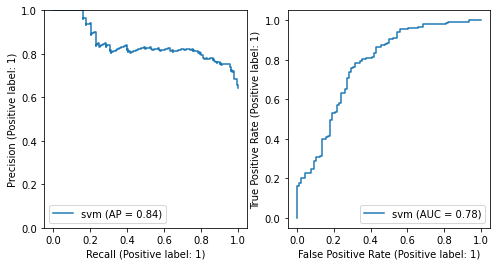

In [12]:
gsc.plot_curves_for_clf()

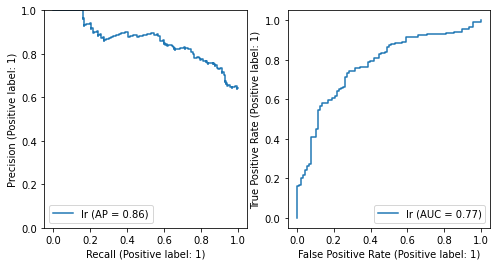

In [13]:
gsc.plot_curves_for_clf(name='lr')

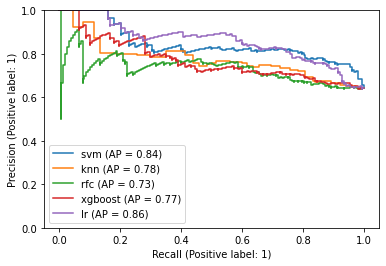

In [14]:
gsc.plot_curve_for_all_clfs()

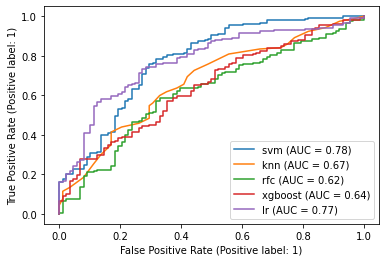

In [15]:
gsc.plot_curve_for_all_clfs(type='roc')

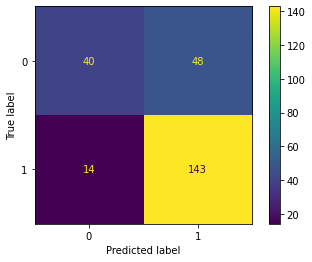

In [16]:
gsc.plot_confusion_matrix_for_clf(name='svm')

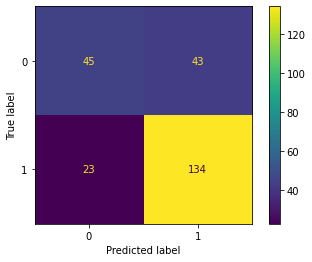

In [17]:
gsc.plot_confusion_matrix_for_clf(name='lr')

# split based on batch

In [18]:
# evaluate a subset of models 
gsc1 = GridSearchClassifier(used_models=['svm', 'knn', 'rfc'])

In [19]:
normalized_df.head()

,CASAPGGSYEQYF,CASGLGGNQPQHF,CASGLSGGNQPQHF,CASGQGGYEQYF,CASIPGGSYEQYF,CASKLGTSYEQYF,CASKLSGGNQPQHF,CASKPGGSYEQYF,CASLPGGSYEQYF,CASNPGGSYEQYF,...,CSASDRGYEQYF,CSASGGGYEQYF,CSASSGHEQYF,CSASSSYEQYF,CSATSGHEQYF,RASSLGTSYEQYF,run,covid,folder,label
0,0.000000,0.000229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,500003930808_S33_L001,covid,#2,1
1,0.000148,0.000297,0.000148,0.000000,0.000148,0.000000,0.000148,0.000148,0.000148,0.000148,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,250002590808_S99_L002,covid,#2,1
2,0.000000,0.000213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,050002290808_S117_L002,covid,#2,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000152,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000076,0.000000,0.000076,0.000152,460000170808_S6_L001,covid,#2,1
4,0.000166,0.000166,0.000166,0.000166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000166,0.0,0.000000,0.000166,0.000000,0.000000,590002490808_S80_L001,covid,#2,1


In [20]:
# specifying the lambda function which would return True for train batch
gsc1.specify_data_and_split(normalized_df, 
                           y='label', 
                           splitting_method=lambda x: x.folder != '#6', 
                           drop_columns=['covid', 'run', 'folder'])

In [21]:
gsc1.X_test

,CASAPGGSYEQYF,CASGLGGNQPQHF,CASGLSGGNQPQHF,CASGQGGYEQYF,CASIPGGSYEQYF,CASKLGTSYEQYF,CASKLSGGNQPQHF,CASKPGGSYEQYF,CASLPGGSYEQYF,CASNPGGSYEQYF,...,CSARGSYEQYF,CSARSGHEQYV,CSARSSYEQYF,CSARTSYEQYF,CSASDRGYEQYF,CSASGGGYEQYF,CSASSGHEQYF,CSASSSYEQYF,CSATSGHEQYF,RASSLGTSYEQYF
406,2.519742,-0.027574,0.986623,0.581612,2.521378,-0.295423,2.745743,2.479018,2.724364,1.967350,...,-0.477375,-0.117422,-0.457696,-0.457725,-0.309595,-0.340924,-0.232658,-0.373655,-0.187619,-0.285288
441,-0.381480,-0.688338,-0.317067,0.537605,-0.380595,-0.295423,-0.291915,-0.397123,-0.364353,-0.393976,...,0.289226,-0.117422,0.626326,0.588457,-0.309595,0.931991,-0.232658,-0.373655,-0.187619,-0.285288
450,-0.381480,-0.688338,-0.317067,-0.507527,-0.380595,-0.295423,-0.291915,-0.397123,-0.364353,-0.393976,...,-0.477375,-0.117422,-0.457696,-0.457725,-0.309595,-0.340924,-0.232658,-0.373655,-0.187619,-0.285288
455,1.352295,-0.688338,-0.317067,-0.507527,1.353628,-0.295423,-0.291915,3.040450,1.481469,1.017156,...,-0.477375,-0.117422,-0.457696,-0.457725,-0.309595,1.244528,-0.232658,-0.373655,-0.187619,-0.285288
474,-0.381480,-0.688338,-0.317067,-0.507527,-0.380595,-0.295423,-0.291915,-0.397123,-0.364353,-0.393976,...,-0.477375,-0.117422,-0.457696,-0.457725,-0.309595,-0.340924,-0.232658,-0.373655,-0.187619,-0.285288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,-0.381480,-0.688338,-0.317067,0.441095,-0.380595,-0.295423,-0.291915,-0.397123,-0.364353,-0.393976,...,-0.477375,-0.117422,-0.457696,-0.457725,-0.309595,-0.340924,-0.232658,-0.373655,-0.187619,-0.285288
965,-0.381480,-0.688338,-0.317067,-0.507527,-0.380595,-0.295423,-0.291915,-0.397123,-0.364353,-0.393976,...,-0.477375,-0.117422,-0.457696,-0.457725,4.943426,-0.340924,-0.232658,-0.373655,-0.187619,-0.285288
986,-0.381480,-0.688338,-0.317067,-0.507527,-0.380595,-0.295423,-0.291915,-0.397123,-0.364353,-0.393976,...,-0.477375,-0.117422,-0.457696,-0.457725,-0.309595,-0.340924,-0.232658,-0.373655,-0.187619,-0.285288
988,1.418292,-0.688338,-0.317067,-0.507527,1.419643,2.037938,-0.291915,1.387090,1.551732,1.070872,...,-0.477375,-0.117422,0.943880,-0.457725,-0.309595,-0.340924,-0.232658,-0.373655,-0.187619,2.312653


In [22]:
gsc1.X_train

,CASAPGGSYEQYF,CASGLGGNQPQHF,CASGLSGGNQPQHF,CASGQGGYEQYF,CASIPGGSYEQYF,CASKLGTSYEQYF,CASKLSGGNQPQHF,CASKPGGSYEQYF,CASLPGGSYEQYF,CASNPGGSYEQYF,...,CSARGSYEQYF,CSARSGHEQYV,CSARSSYEQYF,CSARTSYEQYF,CSASDRGYEQYF,CSASGGGYEQYF,CSASSGHEQYF,CSASSSYEQYF,CSATSGHEQYF,RASSLGTSYEQYF
0,-0.381480,1.924109,-0.317067,-0.507527,-0.380595,-0.295423,-0.291915,-0.397123,-0.364353,-0.393976,...,-0.477375,-0.117422,-0.457696,-0.457725,-0.309595,-0.340924,-0.232658,-0.373655,-0.187619,-0.285288
1,3.328865,2.691837,3.017486,-0.507527,3.330710,-0.295423,3.592916,3.281146,3.585777,2.625901,...,-0.477375,-0.117422,-0.457696,-0.457725,-0.309595,-0.340924,-0.232658,-0.373655,-0.187619,-0.285288
2,-0.381480,1.733361,-0.317067,-0.507527,-0.380595,-0.295423,-0.291915,-0.397123,-0.364353,-0.393976,...,0.986573,-0.117422,-0.457696,-0.457725,-0.309595,-0.340924,-0.232658,-0.373655,-0.187619,-0.285288
3,-0.381480,-0.688338,-0.317067,-0.507527,-0.380595,4.621814,-0.291915,-0.397123,-0.364353,-0.393976,...,0.567002,2.581082,-0.457696,-0.457725,-0.309595,-0.340924,1.843274,-0.373655,2.509619,5.189514
4,3.774624,1.204796,3.418098,2.612933,-0.380595,-0.295423,-0.291915,-0.397123,-0.364353,-0.393976,...,1.811473,-0.117422,2.778878,-0.457725,4.390890,-0.340924,-0.232658,3.203237,-0.187619,-0.285288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,-0.381480,-0.688338,-0.317067,-0.507527,-0.380595,-0.295423,-0.291915,-0.397123,-0.364353,-0.393976,...,-0.477375,-0.117422,-0.457696,-0.457725,-0.309595,-0.340924,-0.232658,-0.373655,-0.187619,-0.285288
1220,0.254717,-0.108754,0.254695,-0.029862,0.255766,0.529391,-0.291915,0.233574,0.312958,0.123829,...,-0.477375,-0.117422,-0.457696,0.020420,-0.309595,0.240846,-0.232658,-0.373655,0.717246,0.633051
1221,0.281900,-0.083989,-0.317067,-0.009452,0.282957,-0.295423,-0.291915,0.260522,0.341899,0.145954,...,-0.477375,-0.117422,-0.457696,-0.457725,-0.309595,0.265705,-0.232658,-0.373655,-0.187619,-0.285288
1222,1.820521,-0.186824,-0.317067,1.972413,1.821976,-0.295423,-0.291915,1.785842,1.979956,1.398249,...,0.128968,-0.117422,1.257117,0.369752,0.935619,1.672698,-0.232658,-0.373655,-0.187619,-0.285288


In [23]:
gsc1.evaluate_models()

classifier       svm       knn       rfc
f1-score    0.786517  0.720379  0.693333
Best model is svm with params: {'C': 50, 'kernel': 'rbf', 'probability': True, 'random_state': 42}


({'svm': SVC(C=50, probability=True, random_state=42),
  'knn': KNeighborsClassifier(leaf_size=1, n_neighbors=100, weights='distance'),
  'rfc': RandomForestClassifier(max_depth=3, min_samples_leaf=8, n_estimators=75,
                         n_jobs=-1, random_state=42)},
 'svm')